# PYTON INTERMEDIO
## LECCIÓN NRO. 2 - PRIMER BIMESTRE

## TEMA: MATPLOTLIB, NUMPY.LINALG 

- Nombre: Luisa Fernanda Bermeo Salazar
- Fecha: 1 de diciembre de 2020

### Problema 1 (6 Pts.)

Utilizando el archivo "earthquake.csv" encontrar las gráficas siguientes:
    
- Trace los datos utilizando puntos como marcas para ver si podemos identificar patrones visibles (tiempo vs magnitud).
- Haz un histograma de la distribución de las magnitudes de los terremoto

Configure para la información de los ejes sea clara.

In [1]:
# Descargue los datos ejecutando la siguiente instrucción
!curl -L -o earthquakes.csv "https://risk-engineering.org/static/data/earthquakes-2017.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 14  280k   14 40427    0     0  40427      0  0:00:07  0:00:01  0:00:06 33164
100  280k  100  280k    0     0   280k      0  0:00:01  0:00:01 --:--:--  163k


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_df = pd.read_csv('earthquakes-2017.csv', parse_dates=['time'], index_col='id')
data_df.dropna(axis=0, subset=["mag"], inplace=True)
data_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
id,,,,,,,,,,,,,,,,,,,,,
us1000bymc,2017-12-31 20:59:02.500000+00:00,-53.0266,-118.3468,10.00,5.1,mb,NaN,37.0,30.620,0.85,...,2018-03-17T01:54:41.040Z,Southern East Pacific Rise,earthquake,13.7,1.8,0.053,117.0,reviewed,us,us
us1000bylw,2017-12-31 20:27:49.390000+00:00,-8.1161,68.0644,10.00,5.1,mww,NaN,59.0,12.965,0.72,...,2018-03-17T01:54:41.040Z,Chagos Archipelago region,earthquake,6.5,1.8,0.062,25.0,reviewed,us,us
us1000byj1,2017-12-31 14:53:31.580000+00:00,5.4949,124.9006,30.80,5.1,mww,NaN,60.0,1.703,1.01,...,2018-03-17T01:54:40.040Z,"40km S of Daliao, Philippines",earthquake,6.7,4.0,0.073,18.0,reviewed,us,us
us1000byj2,2017-12-31 14:51:58.200000+00:00,-11.8634,165.4973,9.55,5.1,mb,NaN,74.0,5.963,1.03,...,2018-03-17T01:54:40.040Z,"132km SSW of Lata, Solomon Islands",earthquake,9.1,4.1,0.059,92.0,reviewed,us,us
us1000byey,2017-12-31 03:48:57.420000+00:00,29.6759,129.3045,162.80,5.0,mww,NaN,89.0,2.972,0.77,...,2018-03-17T01:54:40.040Z,"146km N of Naze, Japan",earthquake,7.6,4.2,0.065,23.0,reviewed,us,us


In [4]:
sample_df = data_df[["time", "mag"]]
sample_df.head()

,time,mag
id,,
us1000bymc,2017-12-31 20:59:02.500000+00:00,5.1
us1000bylw,2017-12-31 20:27:49.390000+00:00,5.1
us1000byj1,2017-12-31 14:53:31.580000+00:00,5.1
us1000byj2,2017-12-31 14:51:58.200000+00:00,5.1
us1000byey,2017-12-31 03:48:57.420000+00:00,5.0


In [5]:
# Extraccion de los datos en listas
times = sample_df.iloc[:,0]
magnitudes = sample_df.iloc[:,1]

Text(0, 0.5, 'Magnitud')

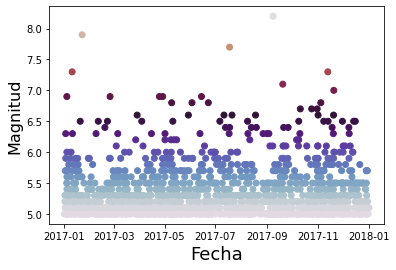

In [6]:
plt.scatter(times, magnitudes, c=magnitudes, cmap=plt.cm.twilight)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Magnitud', fontsize=16)

In [7]:
data_hist = data_df[["mag", "time"]].groupby(["mag"]).count()
data_hist.columns = ['count']

# Extraccion de los datos en listas
values_hist = data_hist.iloc[:, 0]

Text(0, 0.5, 'Magnitudes')

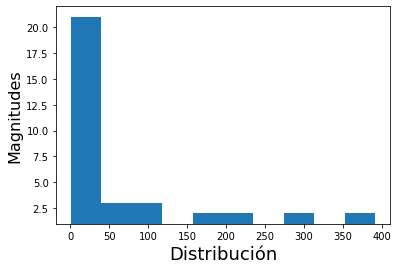

In [8]:
plt.hist(values_hist, bins=10, bottom=True)
plt.xlabel("Distribución", fontsize=18)
plt.ylabel("Magnitudes", fontsize=16)

### Problema 2 (4 Pts)

Suponga que un vendedor de frutas vendió 20 mangos y 10 naranjas en un día por un total de \\$350. Al día siguiente vendió 17 mangos y 22 naranjas por \\$500. Si los precios de las frutas se mantuvieron sin cambios en ambos días, ¿cuál fue el precio de un mango y una naranja? Utilice linalg para resolver este problema. 